<a href="https://colab.research.google.com/github/JeonChaeHwan/oss/blob/main/osmnx1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

In [5]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

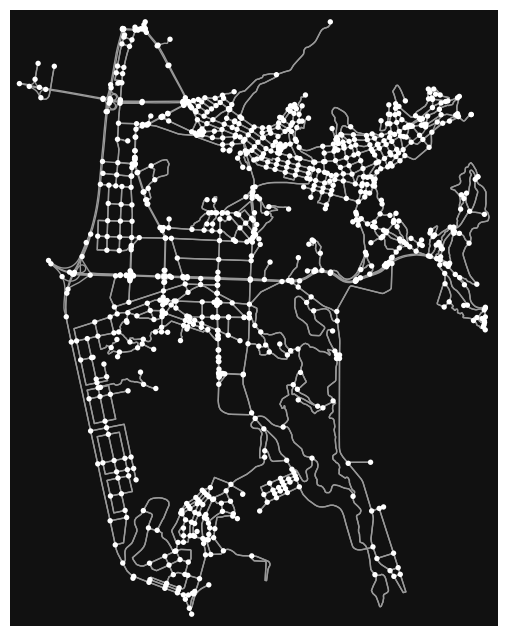

In [6]:
# download/model a street network for some city then visualize it
place = "Saha-gu, Busan, Korea"
G = ox. graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G)

In [7]:
# edge의 타입 따라서 도로에 대한 색깔 다르게 표시하기
hwy_colors = {'footway': 'skyblue',
              'residential': 'paleturquoise',
              'cycleway': 'lightgreen',
              'service': 'sienna',
              'living street': 'orange',
              'secondary': 'black',
              'pedestrian': 'lightskyblue'}

In [8]:
# edge를 탐색
def find_edges(G, hwys):
  edges = []
  for u, v, k, data in G.edges(keys=True, data='highway'):
    check1 = isinstance(data, str) and data not in hwys
    check2 = isinstance(data, list) and all([d not in hwys for d in hwys])
    if check1 or check2:
      edges.append((u, v, k))
  return set(edges)

In [9]:
# hwy이 정해지지 않은 경우는 black
G_tmp = G.copy()
G_tmp.remove_edges_from(G.edges - find_edges(G, hwy_colors.keys()))
m = ox.plot_graph_folium(G_tmp, popup_attribute='highway', weight=5, color='black')

# 지도 위에서 Hwy_colors에서 정해진 타입에 따라 추가적인 edge를 그림
for hwy, color in hwy_colors.items():
  G_tmp = G.copy()
  G_tmp.remove_edges_from(G.edges - find_edges(G, [hwy]))
  if G_tmp.edges:
    m = ox.plot_graph_folium(G_tmp,
                             graph_map=m,
                             popup_attribute='highway',
                             weight=5,
                             color=color)

<ipython-input-9-7c05dc410d01>:4: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  m = ox.plot_graph_folium(G_tmp, popup_attribute='highway', weight=5, color='black')
<ipython-input-9-7c05dc410d01>:11: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  m = ox.plot_graph_folium(G_tmp,
<ipython-input-9-7c05dc410d01>:11: FutureWarning: